In [2]:
import pandas as pd 
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

def load_data(file_path):
    df = pd.read_csv(file_path)

    return df

file_path = 'data/salary.csv'
df = load_data(file_path)
df.head()


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,"122,568.00",NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,"110,796.00",NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,"122,112.00",NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.00,NaN,45.90
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,"86,730.00",NaN


In [4]:
# Perform EDA 
def perform_eda(df):

    duplicates = df.duplicated().sum()
    missing_values = df.isna().sum()
    data_info = df.info()

    print(f'Data Structure : {data_info}')
    print('-'*50)
    print(f'Number of Duplicates: {duplicates}')
    print(f'Number of Missing Values: {missing_values}')

perform_eda(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31101 entries, 0 to 31100
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               31101 non-null  object 
 1   Job Titles         31101 non-null  object 
 2   Department         31101 non-null  object 
 3   Full or Part-Time  31101 non-null  object 
 4   Salary or Hourly   31101 non-null  object 
 5   Typical Hours      6814 non-null   float64
 6   Annual Salary      24287 non-null  float64
 7   Hourly Rate        6814 non-null   float64
dtypes: float64(3), object(5)
memory usage: 1.9+ MB
Data Structure : None
--------------------------------------------------
Number of Duplicates: 0
Number of Missing Values: Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        24287
Annual Salary         6814
Hourly Rate          24287
dtype: int64


In [5]:
# Check for anomalous values in each column 
def check_unique_values(df):
    count_unique = df.nunique() # return the number of unique values in the column
    print(f'Number of Unique Values: {count_unique}')
    print('-' * 50)

    for column_name in df.columns: 
        print(f'\nUnique Values in {column_name}')
        unique_values = df[column_name].unique()
        print(unique_values)
        print('-' * 50)


check_unique_values(df)



Number of Unique Values: Name                 30820
Job Titles            1078
Department              36
Full or Part-Time        2
Salary or Hourly         2
Typical Hours            4
Annual Salary          932
Hourly Rate            148
dtype: int64
--------------------------------------------------

Unique Values in Name
['AARON,  JEFFERY M' 'AARON,  KARINA' 'ABAD JR,  VICENTE M' ...
 'ZYMANTAS,  MARK E' 'ZYRKOWSKI,  CARLO E' 'ZYSKOWSKI,  DARIUSZ']
--------------------------------------------------

Unique Values in Job Titles
['SERGEANT' 'POLICE OFFICER (ASSIGNED AS DETECTIVE)' 'CIVIL ENGINEER IV'
 ... 'LEAVE OF ABSENCE ADMIN' 'PHOTOGRAPHER' 'MECHANICAL ENGINEER IV']
--------------------------------------------------

Unique Values in Department
['POLICE' 'WATER MGMNT' 'TRANSPORTN' 'AVIATION' 'FIRE' 'FAMILY & SUPPORT'
 'LAW' 'STREETS & SAN' 'OEMC' 'DAIS' 'FINANCE' 'CULTURAL AFFAIRS'
 'PUBLIC LIBRARY' 'HOUSING' 'BUILDINGS' 'BUSINESS AFFAIRS' 'HEALTH'
 'CITY COUNCIL' 'HUMAN RESOURC

In [6]:
# Number of departments 
dept_counts = df['Department'].value_counts()
print('Department value counts')
dept_counts

Department value counts


Department
POLICE                 12537
FIRE                    4801
STREETS & SAN           2004
AVIATION                1887
WATER MGMNT             1826
TRANSPORTN              1091
PUBLIC LIBRARY          1018
DAIS                     967
OEMC                     864
HEALTH                   554
FAMILY & SUPPORT         552
FINANCE                  478
CITY COUNCIL             359
LAW                      331
PUBLIC SAFETY ADMIN      294
BUILDINGS                232
BUSINESS AFFAIRS         167
HOUSING & ECON DEV       152
COPA                     122
BOARD OF ELECTION        109
MAYOR'S OFFICE            99
INSPECTOR GEN             93
CITY CLERK                81
PROCUREMENT               78
HOUSING                   73
HUMAN RESOURCES           69
ANIMAL CONTRL             62
CULTURAL AFFAIRS          59
ADMIN HEARNG              35
BUDGET & MGMT             33
TREASURER                 27
DISABILITIES              21
HUMAN RELATIONS           15
BOARD OF ETHICS            8
POL

In [7]:
# Statistics 
statistics = df.describe().T 
print('Summary Statistics')
statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
Typical Hours,"6,814.00",36.48,8.22,10.00,40.00,40.00,40.00,40.00
Annual Salary,"24,287.00","98,750.84","22,459.97","21,600.00","86,730.00","98,940.00","109,236.00","275,004.00"
Hourly Rate,"6,814.00",38.85,12.98,3.00,34.55,39.25,49.30,134.40


### Explore the top 2 departments with the most employees 


In [8]:
# Take the top 2 departments only 
df = df[df['Department'].isin(['POLICE', 'FIRE'])]
df['Department'].value_counts()

Department
POLICE    12537
FIRE       4801
Name: count, dtype: int64

In [10]:
# Check police and fire dept dataframe

perform_eda(df)

<class 'pandas.core.frame.DataFrame'>
Index: 17338 entries, 0 to 31099
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               17338 non-null  object 
 1   Job Titles         17338 non-null  object 
 2   Department         17338 non-null  object 
 3   Full or Part-Time  17338 non-null  object 
 4   Salary or Hourly   17338 non-null  object 
 5   Typical Hours      9 non-null      float64
 6   Annual Salary      17329 non-null  float64
 7   Hourly Rate        9 non-null      float64
dtypes: float64(3), object(5)
memory usage: 1.2+ MB
Data Structure : None
--------------------------------------------------
Number of Duplicates: 0
Number of Missing Values: Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        17329
Annual Salary            9
Hourly Rate          17329
dtype: int64


In [12]:
# Fill missing values for each column explicitly 
df['Typical Hours'] = df['Typical Hours'].fillna(0)
df['Annual Salary'] = df['Annual Salary'].fillna(0)
df['Hourly Rate'] = df['Hourly Rate'].fillna(0)

# Verify if there are still missing values
perform_eda(df)


<class 'pandas.core.frame.DataFrame'>
Index: 17338 entries, 0 to 31099
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               17338 non-null  object 
 1   Job Titles         17338 non-null  object 
 2   Department         17338 non-null  object 
 3   Full or Part-Time  17338 non-null  object 
 4   Salary or Hourly   17338 non-null  object 
 5   Typical Hours      17338 non-null  float64
 6   Annual Salary      17338 non-null  float64
 7   Hourly Rate        17338 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.2+ MB
Data Structure : None
--------------------------------------------------
Number of Duplicates: 0
Number of Missing Values: Name                 0
Job Titles           0
Department           0
Full or Part-Time    0
Salary or Hourly     0
Typical Hours        0
Annual Salary        0
Hourly Rate          0
dtype: int64


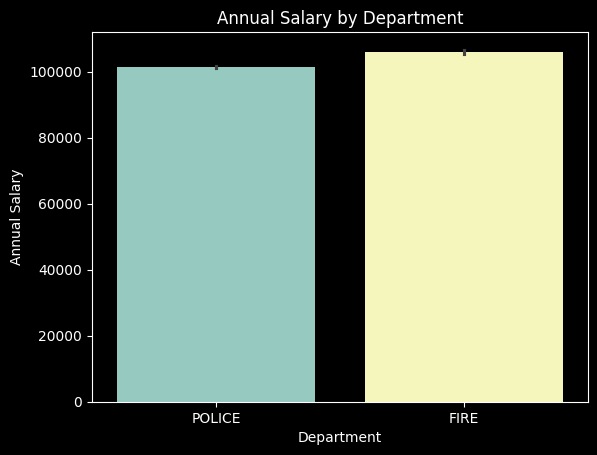

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dark mode
plt.style.use('dark_background')
sns.barplot(data=df,
            x='Department',
            y='Annual Salary',
            hue='Department')
plt.title('Annual Salary by Police and Fire Departments')
plt.show()


In [15]:
# Check statistics for annual salary between police and fire departments 
df['Annual Salary'].describe()

count    17,338.00
mean    102,647.25
std      19,406.08
min           0.00
25%      94,152.00
50%     102,372.00
75%     109,236.00
max     260,004.00
Name: Annual Salary, dtype: float64

Average Salary by Department 
Department
FIRE     106,029.22
POLICE   101,352.13
Name: Annual Salary, dtype: float64


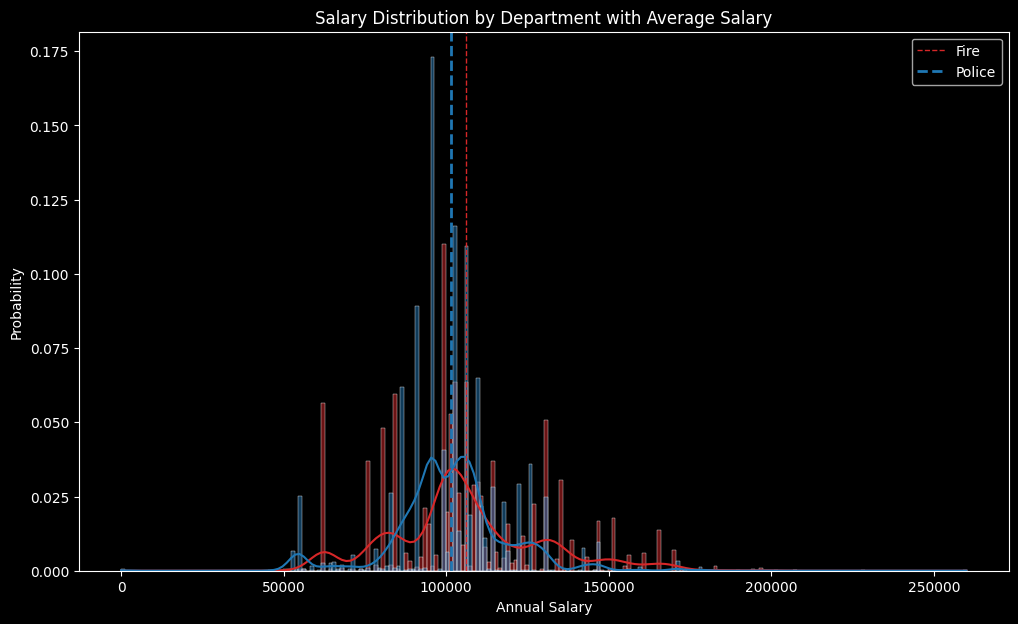

Statistics by Department


,mean,std,min,max
Department,,,,
FIRE,"106,029.22","23,317.54","51,408.00","228,612.00"
POLICE,"101,352.13","17,509.46",0.00,"260,004.00"


In [21]:
# Use the entire dataset for visualization 
group_means = df.groupby('Department')['Annual Salary'].mean()
print('Average Salary by Department ')
print(group_means)

# Histogram
pallette = {
    'FIRE':'tab:red',
    'POLICE':'tab:blue'
}

fig, ax = plt.subplots(figsize=(12, 7))

# Plot distribution by department 
sns.histplot(data=df,
             hue = 'Department',
             x='Annual Salary',
             kde=True,
             stat='probability',
             ax=ax,
             palette=pallette,
             common_norm=False)

# Add vertical line for average salaries 
ax.axvline(group_means.loc['FIRE'],color=pallette['FIRE'], ls='--', lw=1, label='Fire')
ax.axvline(group_means.loc['POLICE'],color=pallette['POLICE'], ls='--', lw=2, label='Police')
ax.legend()
plt.title('Salary Distribution by Department with Average Salary')
plt.show()

# Display statistics for each department 
dept_statistics = df.groupby('Department')['Annual Salary'].agg(['mean', 'std','min','max'])
print('Statistics by Department')
dept_statistics

In [23]:
import numpy as np 
from scipy import stats

# Extract the data  for the fire department 
fire_data = df[df['Department'] == 'FIRE']['Annual Salary']
fire_data.head()

6    118,830.00
10    84,612.00
13   117,384.00
16   104,814.00
18   110,196.00
Name: Annual Salary, dtype: float64

In [24]:
# Calculate mean and standard deviation for the fire department 
fire_mean = fire_data.mean()
fire_std = fire_data.std()
print(f'Mean (Fire): {fire_mean}, Standard Deviation (Fire): {fire_std}')

Mean (Fire): 106029.22217871276, Standard Deviation (Fire): 23317.542959265098


In [25]:
# Get x-values for the normal distribution curve
fire_xs = np.linspace(fire_data.min()-2 , fire_data.max() + 2, 100)
print(f'X-values for PDF (Fire): {fire_xs[:5]} ... {fire_xs[-5:]}')

X-values for PDF (Fire): [51406.         53195.97979798 54985.95959596 56775.93939394
 58565.91919192] ... [221454.08080808 223244.06060606 225034.04040404 226824.02020202
 228614.        ]


In [26]:
# Calculate normal distribution PDF
fire_pdf = stats.norm.pdf(fire_xs, loc=fire_mean, scale=fire_std)
print(f'PDF values (Fire): {fire_pdf[:5]} ... {fire_pdf[-5:]}')

PDF values (Fire): [1.10050479e-06 1.31344253e-06 1.55837133e-06 1.83811026e-06
 2.15532569e-06] ... [8.17143793e-11 5.57169831e-11 3.77674302e-11 2.54500133e-11
 1.70490165e-11]


In [27]:
# Extract the data  for the fire department 
police_data = df[df['Department'] == 'POLICE']['Annual Salary']
police_data.head()

# Calculate mean and standard deviation for the fire department 
police_mean = police_data.mean()
police_std = police_data.std()
print(f'Mean (Fire): {police_mean}, Standard Deviation (Fire): {police_std}')

# Get x-values for the normal distribution curve
police_xs = np.linspace(police_data.min()-2 , police_data.max() + 2, 100)
print(f'X-values for PDF (Fire): {police_xs[:5]} ... {police_xs[-5:]}')

# Calculate normal distribution PDF
police_pdf = stats.norm.pdf(police_xs, loc=police_mean, scale=police_std)
print(f'PDF values (Fire): {police_pdf[:5]} ... {police_pdf[-5:]}')

Mean (Fire): 101352.13384063174, Standard Deviation (Fire): 17509.460773680225
X-values for PDF (Fire): [-2.00000000e+00  2.62434343e+03  5.25068687e+03  7.87703030e+03
  1.05033737e+04] ... [249500.62626263 252126.96969697 254753.31313131 257379.65656566
 260006.        ]
PDF values (Fire): [1.20685139e-12 2.84345753e-12 6.55041226e-12 1.47543289e-11
 3.24937042e-11] ... [6.48917063e-21 1.80356247e-21 4.90119656e-22 1.30227286e-22
 3.38322433e-23]


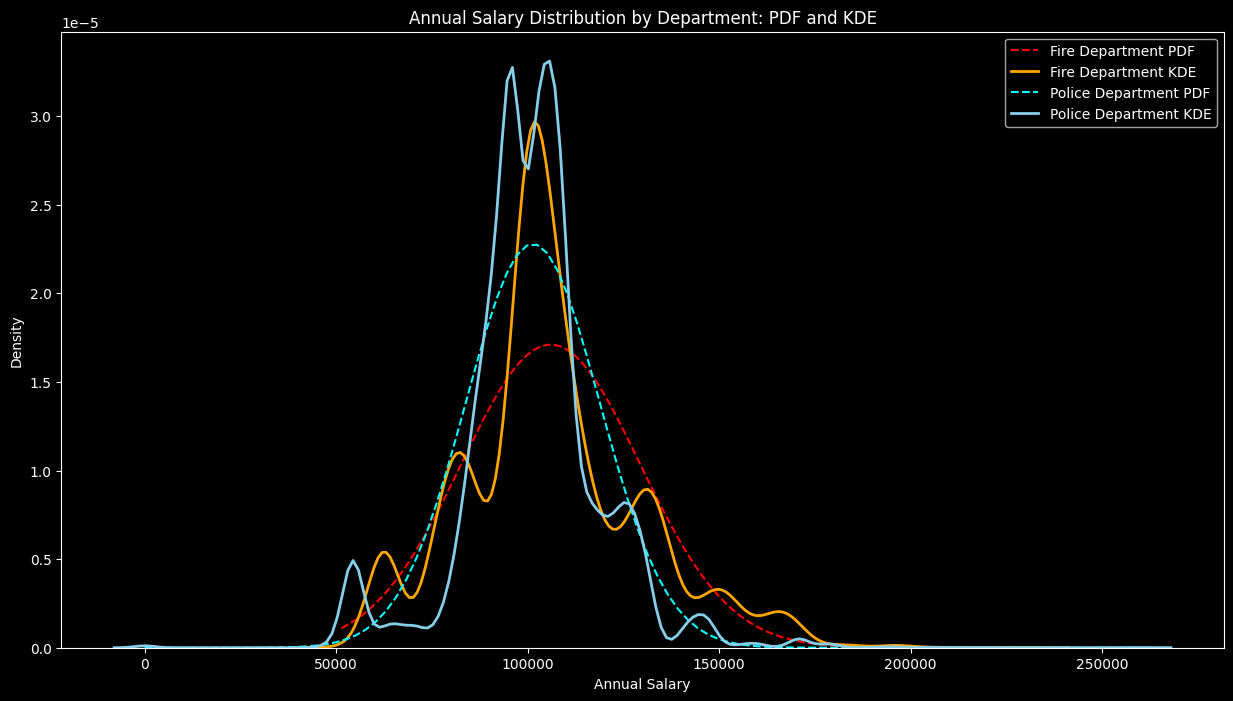

In [33]:
# Plot the PDF and KDE
plt.figure(figsize=(15,8))

# Fire Department PDF and KDE
plt.plot(fire_xs, fire_pdf, label='Fire Department PDF', ls = '--', color='red')
sns.kdeplot(data=fire_data, label='Fire Department KDE', lw=2, color='orange')

# Police department PDF and KDE
plt.plot(police_xs, police_pdf, label='Police Department PDF', ls = '--', color='cyan')
sns.kdeplot(data=police_data, label='Police Department KDE', lw=2, color='skyblue')

plt.title('Annual Salary Distribution by Department: PDF and KDE')
plt.xlabel('Annual Salary')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()


This plot shows the distribution of annual salaries for two departments: Fire and Police. It includes both Probability Density Function (PDF) curves and Kernel Density Estimation (KDE) curves to illustrate the salary distributions more smoothly.



Both departments have their highest salary densities in a similar range, around $75,000 - $125,000.
The KDE (solid lines) smooths out the distribution, making it easier to see the general salary trend, while the PDF (dashed lines) provides the exact probability distributions.
Comparative Density:

The Police Department appears to have a slightly broader and taller peak than the Fire Department, suggesting a higher density of salaries clustered around the average.
Both KDEs show additional smaller peaks at higher salary ranges, indicating a few higher-paying positions within each department.
Tail Behavior:

Both distributions have long tails extending toward higher salaries, though these become very sparse (approaching zero density) beyond $150,000.
The KDE curves highlight any multimodality (secondary peaks) in salary, which may imply some specialized roles with higher salaries within each department.
Salary Range:

Most salaries fall below $150,000, with very few employees earning above this threshold in both departments.

Probability Density Function 
- how likely is it to find a salary at a particular point in the distribution



Kernel Density Function
- smoother version of the PDF that provides overall shape of the distribution 


In [39]:
class DepartmentSalaryAnalzyer:
    def __init__(self, df,department):
        self.df = df
        self.department = department
        self.data = self.df[self.df['Department']== department]['Annual Salary'].dropna()

        
    def visualize_outliers(self, color):
            plt.figure(figsize=(15,8))
            sns.histplot(self.data, kde=True, color=color)
            plt.title(f'Distribution of {self.department} Annual Salary and Outliers')
            plt.xlabel('Annual Salary')
            plt.ylabel('Frequency')
            plt.show()
                      
    def identify_outliers(self):
            Q1 = self.data.quantile(0.25)
            Q3 = self.data.quantile(0.75)
            IQR = Q3 - Q1

            # Define lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outliers
            outliers = self.data[(self.data < lower_bound) | (self.data > upper_bound)]
            print(f'Number of outliers: {self.department} salaries: {len(outliers)}')
            print(f'Outliers:')
            print(outliers)



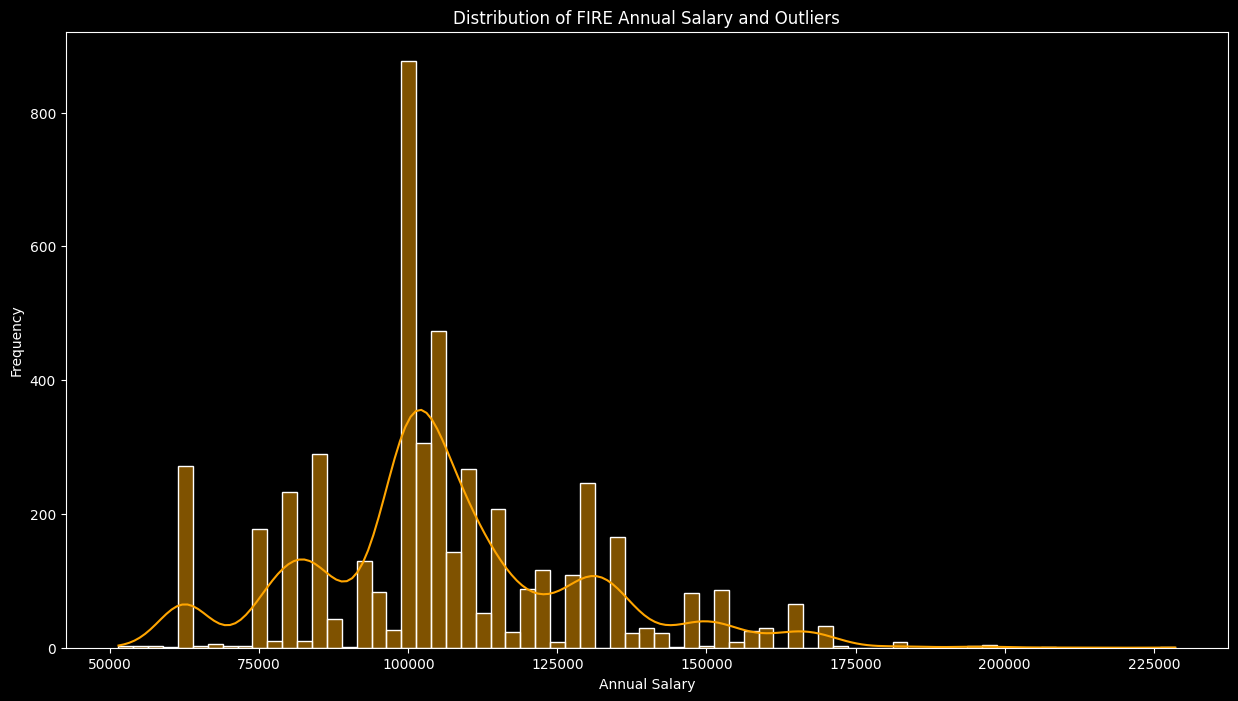

Number of outliers: FIRE salaries: 360
Outliers:
71      161,082.00
176     161,082.00
244     165,858.00
270     151,764.00
280     165,858.00
           ...    
30368   147,258.00
30809   182,640.00
30824   151,764.00
30984   165,858.00
31001   152,412.00
Name: Annual Salary, Length: 360, dtype: float64


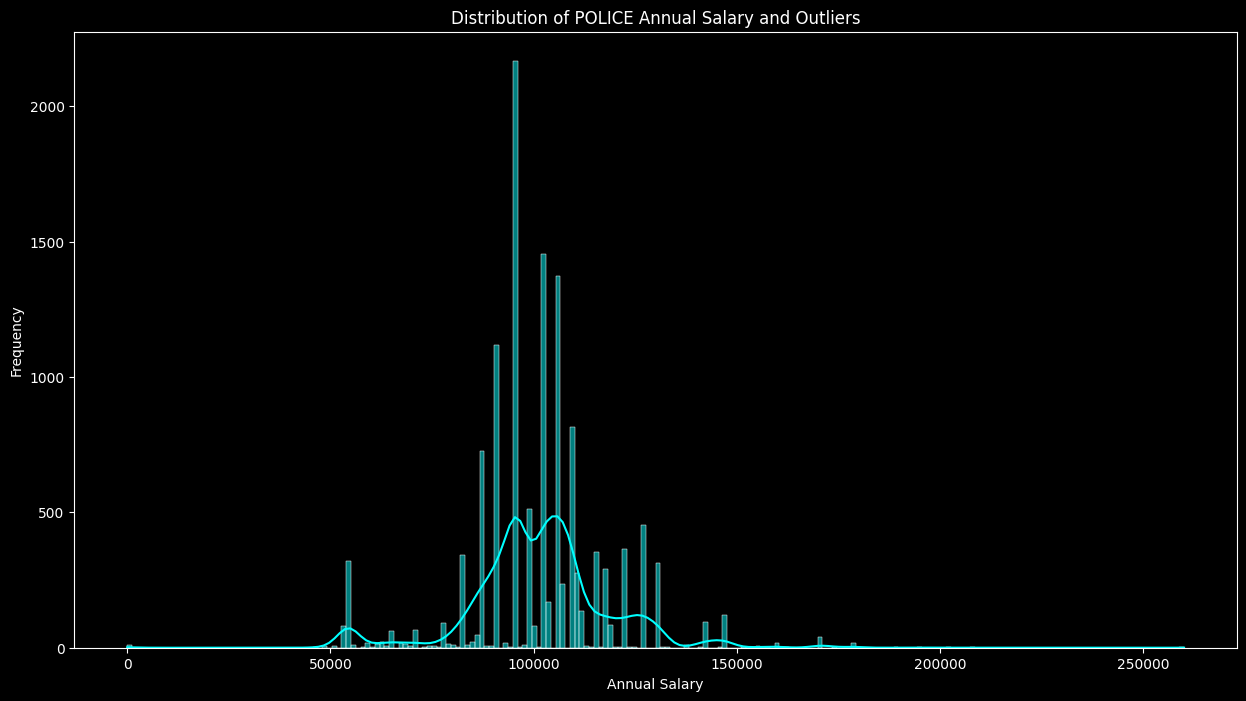

Number of outliers: POLICE salaries: 1316
Outliers:
28       54,672.00
59       54,672.00
96       66,984.00
123     130,596.00
146      54,672.00
           ...    
30896   130,596.00
30906    54,672.00
31029   142,296.00
31048   170,820.00
31087    54,672.00
Name: Annual Salary, Length: 1316, dtype: float64


In [40]:
# Find outliers in the fire department 
fire_analyzer = DepartmentSalaryAnalzyer(df, 'FIRE')
fire_analyzer.visualize_outliers(color='orange')
fire_analyzer.identify_outliers()


# Find outliers in the police department 
police_analyzer = DepartmentSalaryAnalzyer(df, 'POLICE')
police_analyzer.visualize_outliers(color='cyan')
police_analyzer.identify_outliers()




### Business Question 
- Do fire figthers get paid significantly more than police officers?
    - $H_0$: Fire figthers and police officers are paid similar annual salaries
    - $H_1$: Fire figthers and police officers are paid significantly different anunal salaries


- Since this is a fire figthers > police question. This will be a right-tailed t-test.

Reject the null hypothesis : Fire Figthers are paid significantly more than polioce officers
T-statistic: 12.6039, p-value: 0.0000


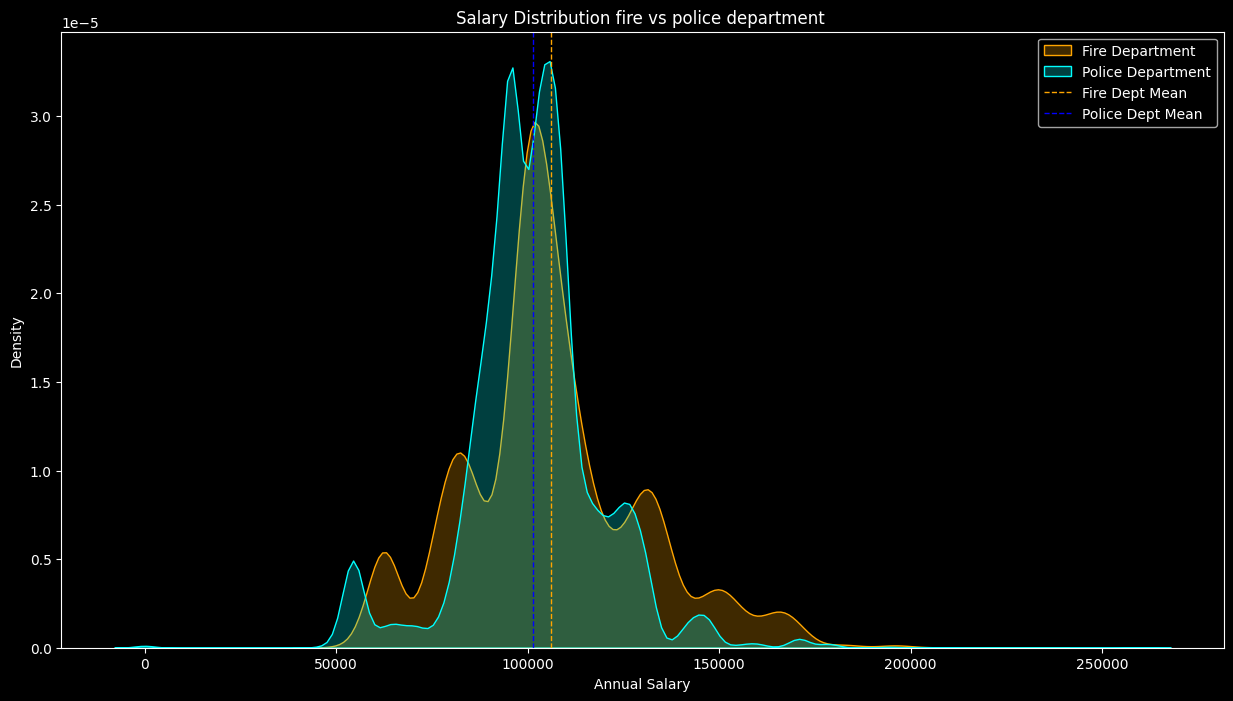

In [41]:
from scipy.stats import ttest_ind 

# Perform T-test
# Extract the salary data for each department
fire_data = df[df['Department'] == 'FIRE']['Annual Salary']
police_data = df[df['Department'] == 'POLICE']['Annual Salary']

# Setup Welch's T-test (equal_var=False)
t_stat, p_value = ttest_ind(fire_data, police_data, alternative='greater', equal_var=False)

# Interpret results
alpha = 0.05 # Significance
if p_value < alpha:
    print('Reject the null hypothesis : Fire Figthers are paid significantly more than polioce officers')

else:
    print('Fail to reject the null hypothesis: No significant evidence that fire figthers are paid more than police officers')


# Print T-statistic and p-value for reference
print(f'T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}')

# Visualize 
plt.figure(figsize=(15,8))

# Plot KDE for both departments
sns.kdeplot(fire_data, label='Fire Department', color='orange', fill=True)
sns.kdeplot(police_data, label='Police Department', color='cyan', fill=True)

# Vertical line for mean variable 
plt.axvline(fire_data.mean(), color='orange', ls='--', lw=1, label='Fire Dept Mean')
plt.axvline(police_data.mean(), color='blue', ls='--', lw=1, label='Police Dept Mean')


plt.title('Salary Distribution fire vs police department ')
plt.xlabel('Annual Salary')
plt.ylabel('Density')
plt.legend(loc='best')  

plt.show()

